In [1]:
!pip install scikit-learn-extra

#  importing all libraries we will use 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids

In [3]:
country_data= pd.read_csv('Country-data.csv')
country_data.head

<bound method NDFrame.head of                  country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5

# drop duplicated rows

In [4]:
country_data = country_data.drop_duplicates(subset='health', keep="first")
country_data = country_data.drop_duplicates(subset='income', keep="first")
country_data.head

<bound method NDFrame.head of                  country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
161           Uzbekistan        36.3     31.7    5.81     28.5    4240   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5

# needed features 

In [5]:
data = country_data.iloc[:, [3,5]].values


# objects from k-Medoids class

In [6]:
cluster = KMedoids(n_clusters=3, metric="manhattan",init="random",random_state=33) 
cluster.fit_predict(data)

array([1, 2, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0, 0, 2, 2,
       2, 1, 0, 1, 1, 0, 0, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 2, 0, 1, 1, 2,
       2, 0, 0, 0, 1, 0, 2, 1, 0, 1, 1, 2, 2, 1, 2, 0, 2, 1, 2, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 2, 0, 2, 1, 1, 1, 2,
       1, 0, 2, 1, 2, 0, 0, 1, 1, 2, 0, 0, 1, 1, 1, 1, 2, 2, 1, 0, 0, 2,
       1, 2, 1, 1, 1], dtype=int64)

# scattering data

Text(0, 0.5, 'Health(1-167)')

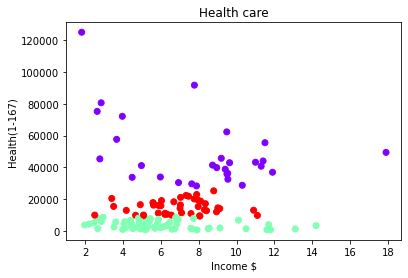

In [8]:
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')
plt.title("Health care")
plt.xlabel("Income $")
plt.ylabel("Health(1-167)")